===== Exemple 1 =====
Les effectifs : [4. 0. 7. 0. 0. 5.]
binX : [0.5 1.5 2.5 3.5 4.5 5.5 6.5]
Nombre de classes : 6


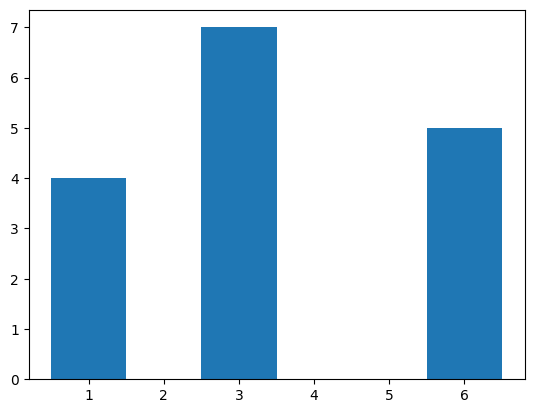

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Exemple 1 : liste de quelques nombres entiers compris entre 1 et 6
X = [1, 3, 6, 6, 1, 3, 3, 6, 1, 3, 6, 6, 3, 1, 3, 3]

# histogramme des effectifs de X
print('===== Exemple 1 =====')
hX, binsX, _ = plt.hist(X, bins=np.arange(1, 8) - 0.5)

# informations sur l'histogramme
print(f'Les effectifs : {hX}')
print(f'binX : {binsX}')
print(f'Nombre de classes : {len(binsX) - 1}')

